# **Final Project Task 2 -Census Data EDA**

Requirements

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

- Check for missing values and report the number and percentage of missing data for each column.

- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

- Generate bar plots for at least three categorical columns and discuss the frequency distributions.

- Identify outliers in at least one numerical column using boxplots.

- Explore relationships between two numerical variables using scatter plots and identify any visible trends.

- Create a correlation matrix for numerical variables and discuss the strongest and weakest correlations.

- Analyze the relationship between one numerical and one categorical variable using boxplots or violin plots.


- Use a heatmap to visualize correlations among variables and highlight the top three strongest correlations.


- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report.

- Others?


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
24516   45           Private  199625  Some-college             10   
17413   28           Private   22422       HS-grad              9   
7920    49           Private   31267       7th-8th              4   
9663    35           Private  186845   Prof-school             15   
591     55                 ?  105138       HS-grad              9   
5839    48           Private   96359     Bachelors             13   
20225   17           Private  224073          11th              7   
28233   29  Self-emp-not-inc  229341       HS-grad              9   
646     31         Local-gov  402089       HS-grad              9   
3340    24           Private  215443       HS-grad              9   

           marital-status        occupation   relationship  \
24516            Divorced    Prof-specialty      Unmarried   
17413       Never-married  Transport-moving      Unmarried   
7920   Married-civ-spouse      Craft-repair        Husband   
9663   Married-civ-spouse    Prof-specialty        Husband   
591    Married-civ-spouse                 ?           Wife   
5839   Married-civ-spouse   Exec-managerial        Husband   
20225       Never-married             Sales      Own-child   
28233       Never-married      Craft-repair  Not-in-family   
646              Divorced      Adm-clerical      Unmarried   
3340            Separated     Other-service  Not-in-family   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
24516               White  Female             0             0              20   
17413               White    Male             0             0              55   
7920                White    Male             0             0              40   
9663                White    Male             0             0              45   
591    Asian-Pac-Islander  Female             0             0              40   
5839                White    Male             0             0              60   
20225               White    Male             0             0              20   
28233               White    Male             0             0              50   
646                 White  Female             0             0              40   
3340                White    Male             0             0              40   

      native-country income  
24516  United-States  <=50K  
17413  United-States  <=50K  
7920   United-States  <=50K  
9663   United-States   >50K  
591    United-States  <=50K  
5839          Greece   >50K  
20225  United-States  <=50K  
28233  United-States   >50K  
646    United-States  <=50K  
3340   United-States  <=50K

##### Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.


In [4]:
# Shows counts, mean, standard deviation, minimum, quartiles, and maximum for numerical columns
data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

##### Check for missing values and report the number and percentage of missing data for each column.

In [6]:
# Count missing values in each column
missing_values_count = data.isnull().sum()
print(missing_values_count)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [13]:
# Apparently there are no missing values in data frame. 
# Use the sample function to explore data
data.sample(n=10)

age  workclass  fnlwgt     education  education-num  \
5558    38    Private  114079       HS-grad              9   
14742   31          ?  163890  Some-college             10   
20059   49    Private  265295       HS-grad              9   
23754   33  Local-gov  152351  Some-college             10   
22849   18    Private  115443          11th              7   
31453   33    Private  207201       HS-grad              9   
4471    46    Private  175109       HS-grad              9   
17685   46  Local-gov  114160       Masters             14   
15250   55    Private  377061     Bachelors             13   
9704    46    Private   82946       HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
5558   Married-civ-spouse              Sales        Husband  White    Male   
14742       Never-married                  ?      Unmarried  Black  Female   
20059       Never-married       Craft-repair  Not-in-family  White    Male   
23754  Married-civ-spouse    Protective-serv        Husband  White    Male   
22849  Married-civ-spouse       Craft-repair        Husband  White    Male   
31453  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
4471   Married-civ-spouse       Adm-clerical        Husband  White    Male   
17685  Married-civ-spouse    Exec-managerial        Husband  White    Male   
15250  Married-civ-spouse    Protective-serv        Husband  White    Male   
9704        Never-married              Sales  Not-in-family  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
5558              0             0              44  United-States  <=50K  
14742             0             0              40  United-States  <=50K  
20059             0             0              40  United-States  <=50K  
23754          3908             0              40  United-States  <=50K  
22849             0             0              40  United-States  <=50K  
31453             0             0              55  United-States   >50K  
4471              0          1485              40  United-States   >50K  
17685             0          1902              45  United-States   >50K  
15250             0             0              40  United-States   >50K  
9704              0             0              40  United-States  <=50K

In [24]:
# There are missing values in the data set, labelled as '?' 
# Replace '?' with NA
data.replace('?', pd.NA, inplace=True)

# Count missing values in each column
missing_values_count = data.isnull().sum()

# Calculate percentage of missing values in each column
total_rows = len(data)
missing_values_percentage = (missing_values_count / total_rows) * 100

# Create a table with missing value information
missing_data = pd.DataFrame({'Missing Values': missing_values_count,
                            'Percentage': missing_values_percentage})

# Filter the DataFrame to keep only rows where at least one missing value exists
missing_data_filtered = missing_data[missing_data.sum(axis=1) > 0]

# Sort by percentage of missing values in descending order
missing_data_filtered = missing_data_filtered.sort_values(by='Percentage', ascending=False)

# Print the table
print(missing_data_filtered)

                Missing Values  Percentage
occupation                1843    5.660146
workclass                 1836    5.638647
native-country             583    1.790486


##### Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

In [26]:
# Check the type of columns in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


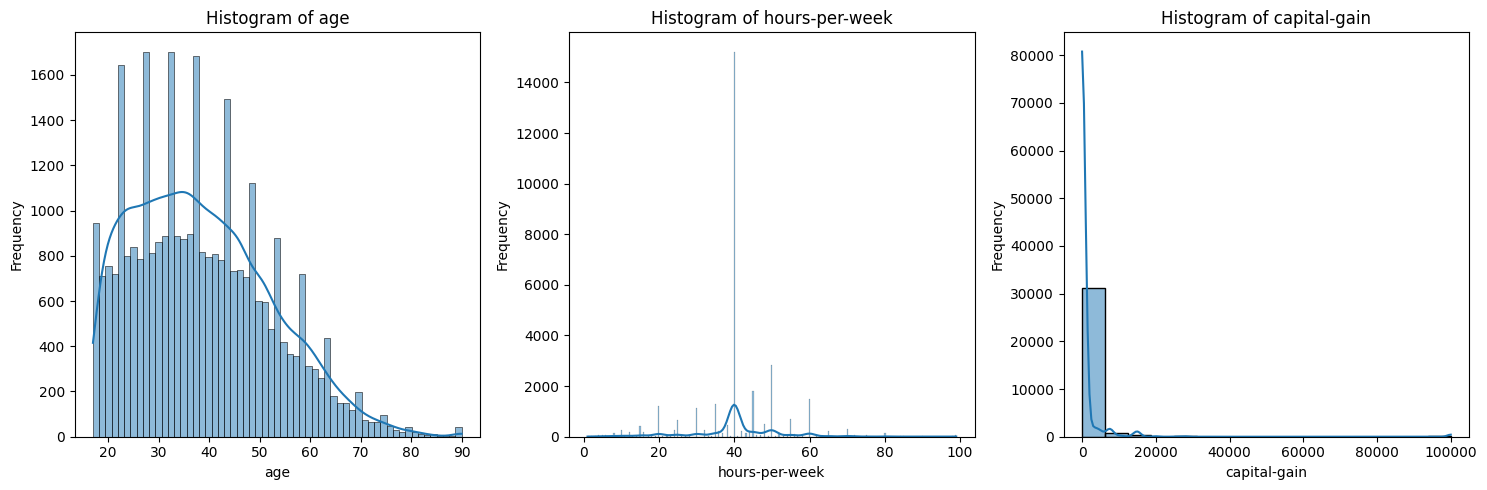

In [29]:
# We select 'age', 'income' and 'hours-per-week' columns, as they are all numerical
numerical_cols = ['age', 'hours-per-week', 'capital-gain'] 

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms for each column
for i, col in enumerate(numerical_cols):
    sns.histplot(data=data, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Histogram discussion
##### Age:

Right-skewed: Most individuals are younger, with a tail towards older ages.
Peak around 35-40: The highest frequency of individuals is in the 35-40 age range.

##### Hours per week:

Unimodal - A single peak indicates a common working pattern.
Peak around 40: Most people work a standard 40-hour week.
Slight right skew: Some individuals work significantly more hours.

##### Capital gain:

Highly right-skewed: Most individuals have low or no capital gains, with a few having very high gains.
Bimodal: There might be a second peak at zero, indicating many individuals with no capital gain.


#### Generate bar plots for at least three categorical columns and discuss the frequency distributions.

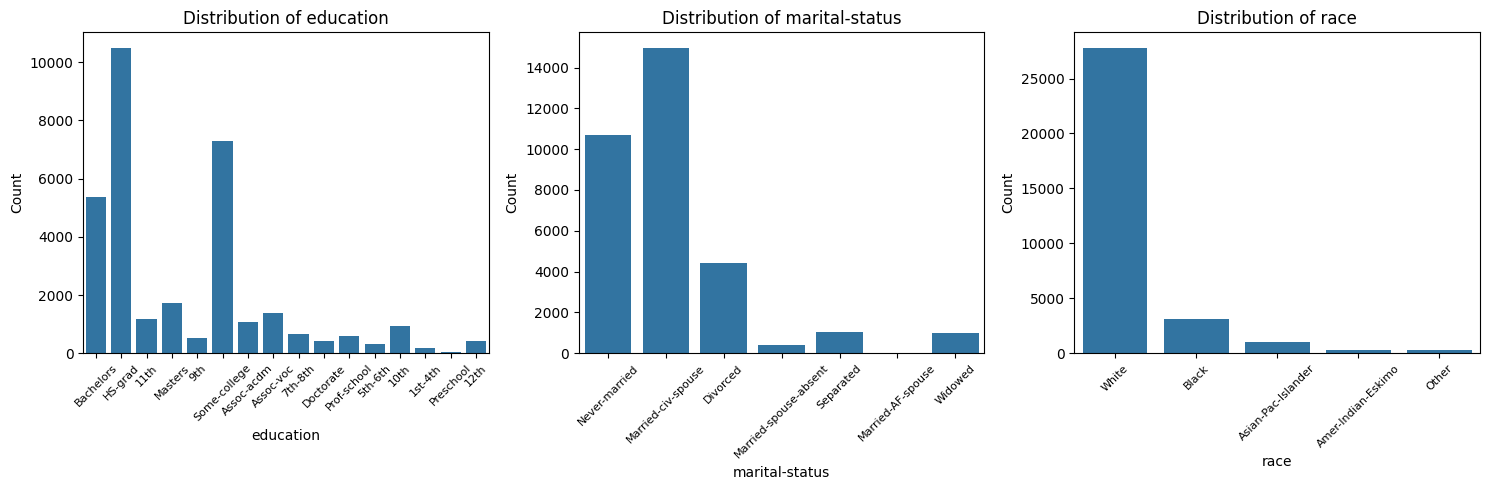

In [30]:
# Categorical columns: 'education', 'marital-status', 'race'
categorical_cols = ['education', 'marital-status', 'race']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot bar plots for each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

##### Education:

Most Frequent: "HS-grad" (High School Graduate) is by far the most common level of education in the dataset.
Other Common Levels: "Some-college" and "Bachelors" are also relatively frequent.
Less Frequent Levels: Levels such as "Doctorate", "Prof-school", and "Preschool" are much less common.

##### Marital-status:

Most Frequent: "Married-civ-spouse" is the most common marital status, indicating a significant portion of the population is married.
Other Common Statuses: "Never-married" and "Divorced" are also relatively frequent.
Less Frequent Statuses: Statuses such as "Married-AF-spouse", "Married-spouse-absent", and "Widowed" are much less common.

##### Race:

Most Frequent: "White" is the most dominant race in the dataset by a significant margin.
Other Races: "Black" is the second most frequent race, followed by "Asian-Pac-Islander" and "Amer-Indian-Eskimo".
Less Frequent Races: "Other" and "Black" have the lowest representation.

##### Overall Observations:

The distribution of education levels shows a significant portion of the population with a high school education or some college.
The distribution of marital status indicates a relatively high proportion of married individuals in the dataset.
The distribution of race shows a significant majority of individuals identifying as White, with other races having lower representation.

----------------------------------------------------------------------

#### Identify outliers in at least one numerical column using boxplots.

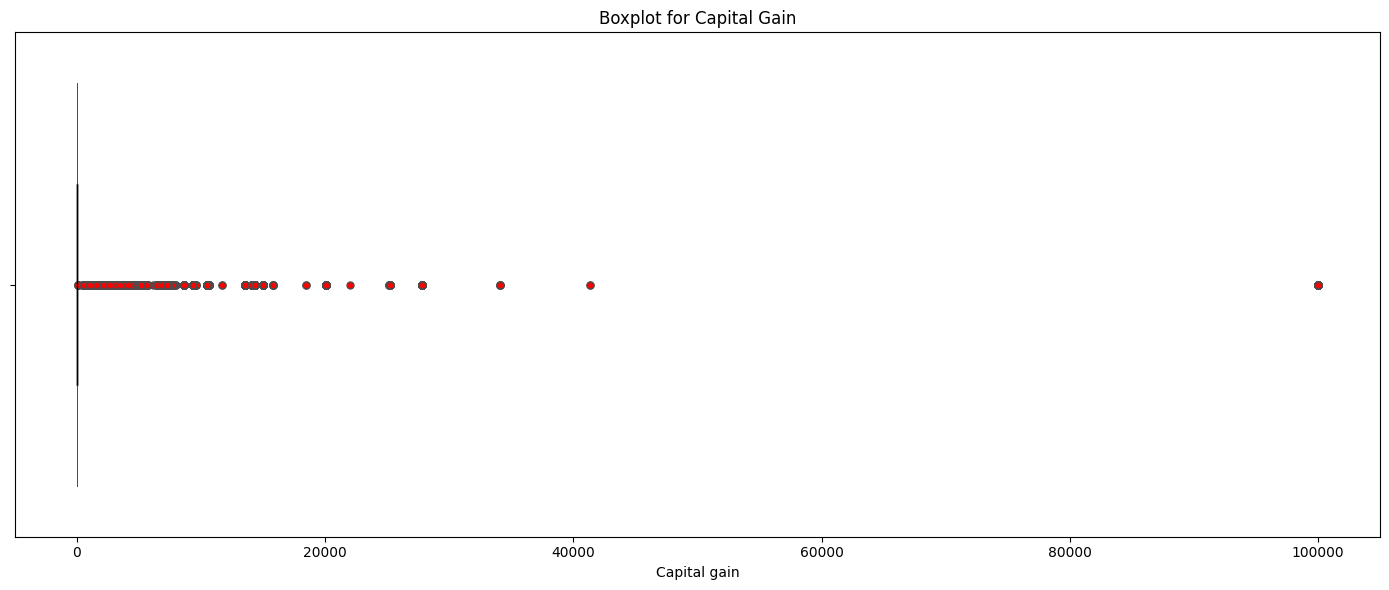

In [49]:
# Visualize outliers and value distribution for 'capital-gain' using a boxplot

plt.figure(figsize=(14, 6))
sns.boxplot(x='capital-gain', data=data, color='blue', notch=True, orient='horizontal', 
            boxprops=dict(linewidth=0.5),
            whiskerprops=dict(color='red', linewidth=1.5),
            medianprops=dict(color='black', linewidth=1),
            flierprops=dict(marker='o', markerfacecolor='red', markersize=5)
            )
plt.title('Boxplot for Capital Gain')
plt.xlabel('Capital gain')
plt.tight_layout()
plt.show()

The boxplot for capital gain reveals a highly skewed distribution, with a majority of individuals having either no capital gain or very low capital gains.
The presence of outliers indicates that there might be some (few) extreme cases.

Outliers in 'age':
74       79
222      90
430      80
918      81
1040     90
         ..
32277    90
32367    90
32459    85
32494    82
32525    81
Name: age, Length: 143, dtype: int64


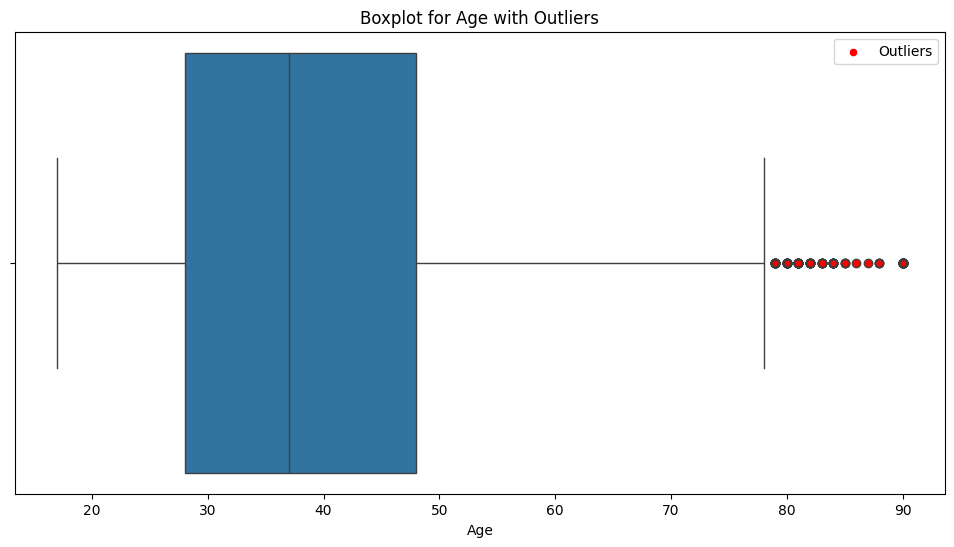

In [54]:

# Calculate the first and third quartiles
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

# Print the outliers
print(f"Outliers in 'age':\n{outliers['age']}") 

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', data=data)

# Plot the outliers as red dots
sns.scatterplot(x=outliers['age'], y=[0]*len(outliers), color='red', label='Outliers')

plt.title('Boxplot for Age with Outliers')
plt.xlabel('Age')
plt.legend()
plt.show()

The distribution of age is right-skewed, meaning there are more younger individuals in the dataset and a few older outliers.
Outliers: The presence of the right-hand whisker and individual data points beyond it indicates the existence of outliers, which are individuals significantly older than the majority.

#### Explore relationships between two numerical variables using scatter plots and identify any visible trends.

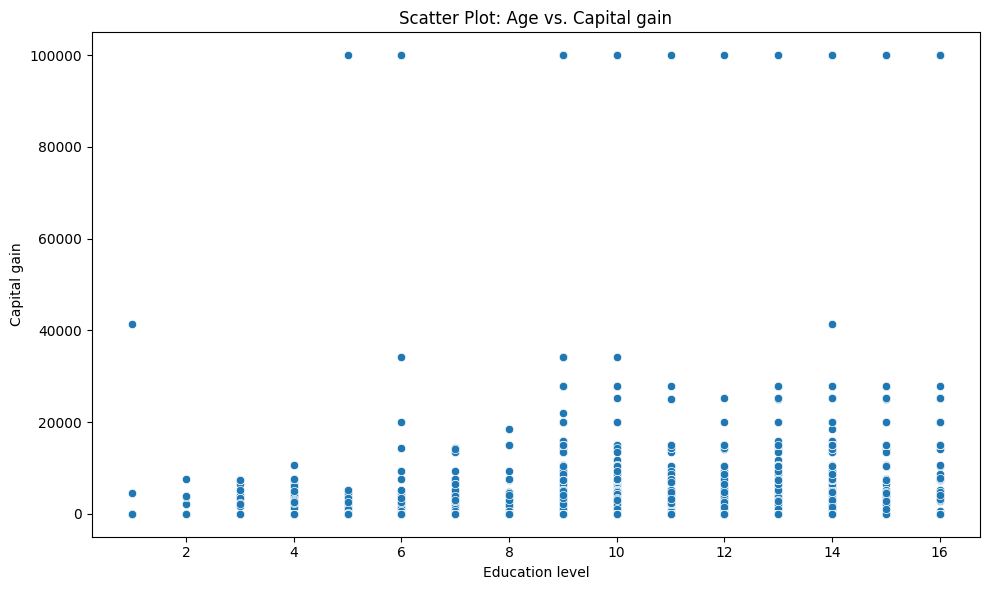

In [ ]:
plt.figure(figsize=(10, 6))
# Create the scatter plot
sns.scatterplot(x='education-num', y='capital-gain', data=data)

# Customize the plot
plt.title('Scatter Plot: Level of education vs. Capital gain')
plt.xlabel('Education level')
plt.ylabel('Capital gain')

# Show the plot
plt.tight_layout()
plt.show()

There isn't a strong, linear relationship between education level and capital gain.
Some clustering of data points can be observed. For instance, there might be a concentration of points at lower education levels and lower capital gains.
A few data points might be far away from the main cluster, representing individuals with significantly higher capital gains for their education level.
Further analysis is needed to fully understand the complex interplay between these variables.

#### Create a correlation matrix for numerical variables and discuss the strongest and weakest correlations.

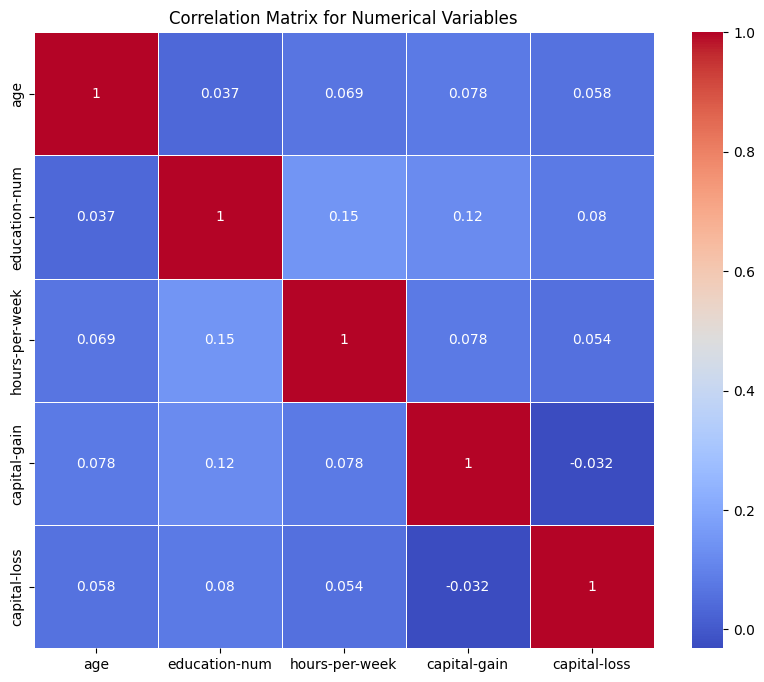

In [79]:
# Select the numerical columns 
numerical_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss'] 

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

No strong linear relationships: The values in the correlation matrix are relatively close to zero, indicating that there are no strong linear relationships between the numerical variables.
Weak positive correlation between education and capital gain: There is a slight positive correlation between education level and capital gain, suggesting that individuals with higher levels of education tend to have slightly higher capital gains. However, this relationship is relatively weak.

Age and capital gain: There seems to be little correlation between age and capital gain, suggesting that age does not significantly influence an individual's capital gain.
Education and hours worked: While there is a slight positive correlation between education level and hours worked per week, the relationship is not very strong.
Capital gain and capital loss: The negative correlation between capital gain and capital loss is expected, as an increase in one typically leads to a decrease in the other. However, the correlation is quite weak.

#### Analyze the relationship between one numerical and one categorical variable using boxplots or violin plots.

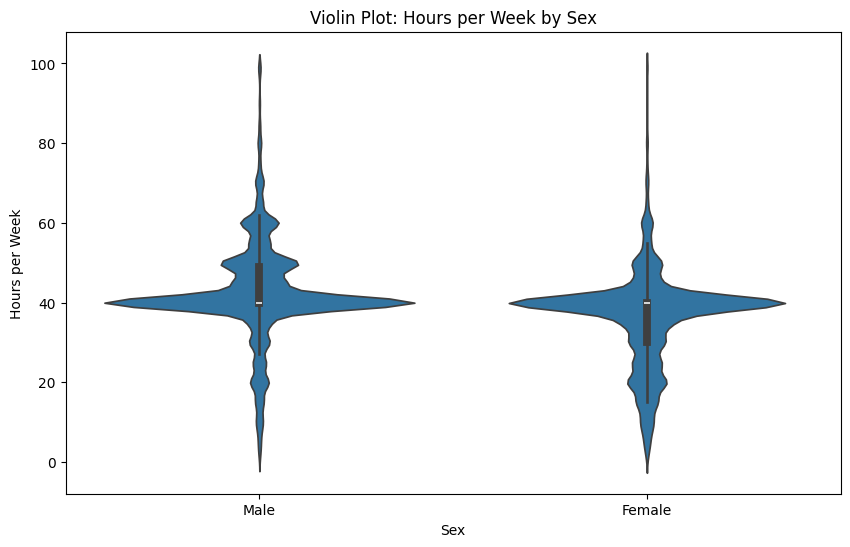

In [81]:
# Create a violin plot to visualize the relationship between sex and hours-per-week
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='hours-per-week', data=data)
plt.title('Violin Plot: Hours per Week by Sex')
plt.xlabel('Sex')
plt.ylabel('Hours per Week')
plt.show()

Shape of the distributions: Both distributions appear to be roughly symmetric, with a slight right skew (tail towards higher values).
Median: The median working hours seem to be slightly higher for males compared to females.
Spread: The spread of working hours appears to be somewhat similar for both sexes, although there might be a slightly wider range for males.

Potential difference in working hours: Based on the violin plot, there might be a slight difference in the typical number of hours worked per week between males and females. Males tend to work slightly more hours on average.
Variability within groups: Both male and female groups exhibit a considerable amount of variability in working hours. This indicates that there is significant heterogeneity within each sex group regarding the number of hours worked.

--------------------------------------------

#### Use a heatmap to visualize correlations among variables and highlight the top three strongest correlations.

Top 3 cele mai puternice corelații pozitive:
        level_0        level_1  Correlation
0           age  education-num     0.036527
1  capital-gain   capital-loss    -0.031615
2  capital-loss   capital-gain    -0.031615


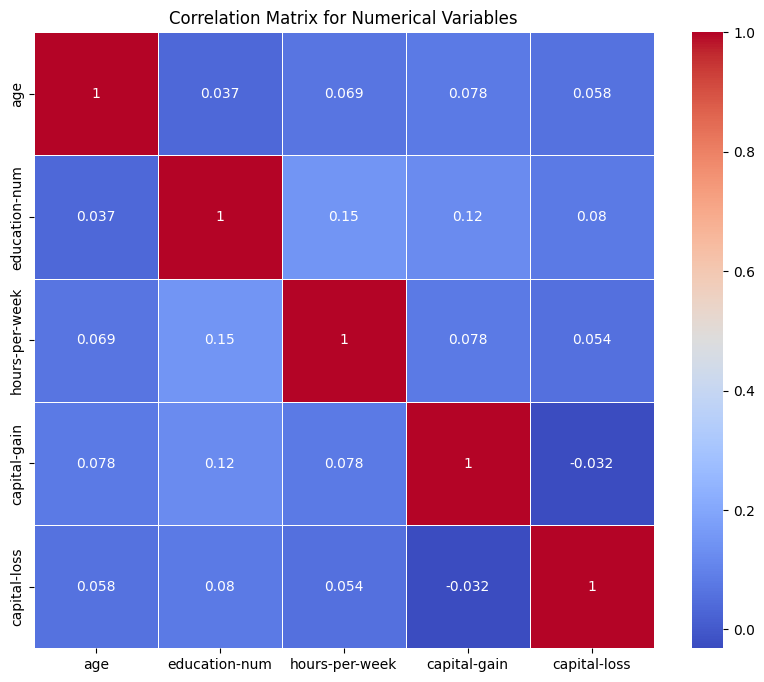

In [85]:
# Select numerical columns
numerical_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']
corr_matrix = data[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Numerical Variables')

# Află perechile de variabile cu cea mai puternică corelație pozitivă
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)

# Afișează primele 3 perechi cu cea mai puternică corelație pozitivă (excluzând autocorelațiile)
print("Top 3 cele mai puternice corelații pozitive:")
top_3_df = sorted_pairs[-3:].reset_index().rename(columns={0: 'Correlation'})
print(top_3_df)

plt.show()